# Lab 3: Iterative Algorithms

> Date: 10/25/2024
> Author: Adam Haile, Leigh Goetsch, Aiden Miller
> Class: CSC3310
>
> ### Learning Outcomes
>
> - Design an algorithm for a given computational problem statement
> - Justify the correctness of an algorithm
> - Perform asymptotic complexity analysis of the run time of an algorithm
> - Generate test cases for an algorithm
> - Correctly implement an algorithm from pseudocode
> - Design and execute benchmarks for an algorithm


## Pseudocode

```python
inclusive = false
points = [list of polygon points]
distinct_point = (x, y)

vectors = drawVectors(points)
right_line = rightVector(distinct_point)

wn = 0
for vector in vectors:
    if counterclockwise_check(vector, right_line) or onsegment_check(vector, right_line, inclusive):
        wn += 1

return wn % 2 == 1
```
## Imports

In [1]:
from typing import List, Tuple
from pydantic import BaseModel



import matplotlib.pyplot as plt

import random as rd
import polygenerator as pg
import time
import statistics as st

## Class and Functions
### Setup and Helper Functions

In [2]:
class Vector(BaseModel):
    """
    Represents a vector in 2D space
    """
    point_1: Tuple[float, float]
    point_2: Tuple[float, float]

def get_right_line(distinct_point: Tuple[float, float]) -> Vector:
    """
    Get the infinite line that is to the right of the distinct point
    """
    return Vector(point_1=distinct_point, point_2=(float('inf'), distinct_point[1]))

def draw_vectors(points: List[Tuple[float, float]]) -> List[Vector]:
    """
    Get a list of vectors from a list of points
    """
    vectors = []
    for i in range(len(points)):
        if i == len(points) - 1:
            vectors.append(Vector(point_1=points[i], point_2=points[0]))
        else:
            vectors.append(Vector(point_1=points[i], point_2=points[(i+1)]))

    return vectors

def plot_polygon(vectors: List[Vector], right_line: Vector) -> None:
    """
    Plot the polygon vectors and the right line
    """
    for vector in vectors:
        x_values = [vector.point_1[0], vector.point_2[0]]
        y_values = [vector.point_1[1], vector.point_2[1]]
        plt.plot(x_values, y_values, marker='o')

    plt.scatter(right_line.point_1[0], right_line.point_1[1])
    plt.plot([right_line.point_1[0], min(3, right_line.point_2[0])], [
            right_line.point_1[1], right_line.point_2[1]], linestyle='--')
    # plt.xlim(-1, 2)
    # plt.ylim(-1, 2)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Polygon Vectors')
    plt.grid(True)
    plt.show()

### Algorithm


In [3]:
def ccw(p1: Tuple[float, float], p2: Tuple[float, float], p3: Tuple[float, float]) -> bool:
    """
    Determine if three points are listed in a counterclockwise order
    Time Complexity: O(1)
    """
    return (p3[1] - p1[1]) * (p2[0] - p1[0]) > (p2[1] - p1[1]) * (p3[0] - p1[0])


def collinear(p1: Tuple[float, float], p2: Tuple[float, float], p3: Tuple[float, float]) -> bool:
    """
    Determine if three points form collinear vectors
    Time Complexity: O(1)
    """
    return (p3[1] - p1[1]) * (p2[0] - p1[0]) == (p2[1] - p1[1]) * (p3[0] - p1[0])


def on_segment(p1: Tuple[float, float], p2: Tuple[float, float], p3: Tuple[float, float]) -> bool:
    """
    Determine if a point is on a segment
    Time Complexity: O(1)
    """
    return collinear(p1, p2, p3) and min(p1[0], p2[0]) <= p3[0] <= max(p1[0], p2[0]) and min(p1[1], p2[1]) <= p3[1] <= max(p1[1], p2[1])


def intersect(v1: Vector, v2: Vector, check_edge: bool) -> bool:
    """
    Determine if two vectors intersect
    Time Complexity: O(1)
    """
    if ccw(v1.point_1, v2.point_1, v2.point_2) != ccw(v1.point_2, v2.point_1, v2.point_2) and ccw(v1.point_1, v1.point_2, v2.point_1) != ccw(v1.point_1, v1.point_2, v2.point_2):
        return True

    if check_edge and (on_segment(v2.point_1, v2.point_2, v1.point_1) or on_segment(v2.point_1, v2.point_2, v1.point_2)):
        return True

    return check_edge and (on_segment(v1.point_1, v1.point_2, v2.point_1) or on_segment(v1.point_1, v1.point_2, v2.point_2))


def inside_polygon(vectors, point, inclusive=True) -> bool:
    """
    Determine if a point is inside a polygon
    Time Complexity: O(n) where n is the number of vectors in the polygon
    """

    right_line = Vector(point_1=point, point_2=(float('inf'), point[1]))

    return sum(intersect(vector, right_line, inclusive) for vector in vectors) % 2 == 1

## Test Cases

In [4]:
points = [(0.5, 0), (0, 1.5), (1, 2.5), (2, 1.5), (1.5, 0)]
distinct_point = (1, 1)

vectors = draw_vectors(points)

vectors

[Vector(point_1=(0.5, 0.0), point_2=(0.0, 1.5)),
 Vector(point_1=(0.0, 1.5), point_2=(1.0, 2.5)),
 Vector(point_1=(1.0, 2.5), point_2=(2.0, 1.5)),
 Vector(point_1=(2.0, 1.5), point_2=(1.5, 0.0)),
 Vector(point_1=(1.5, 0.0), point_2=(0.5, 0.0))]

In [5]:
right_line = get_right_line(distinct_point)
right_line

Vector(point_1=(1.0, 1.0), point_2=(inf, 1.0))

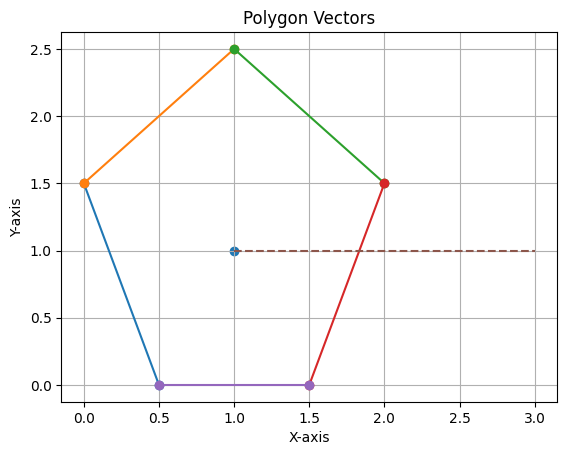

In [6]:
plot_polygon(vectors, right_line)

In [7]:
inside_polygon(vectors, distinct_point)

True

## Benchmarking

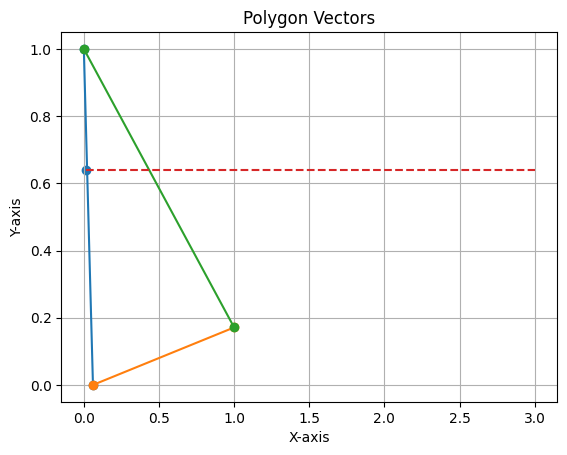

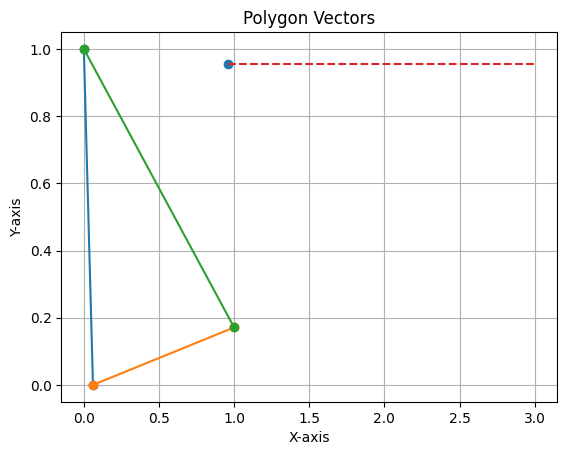

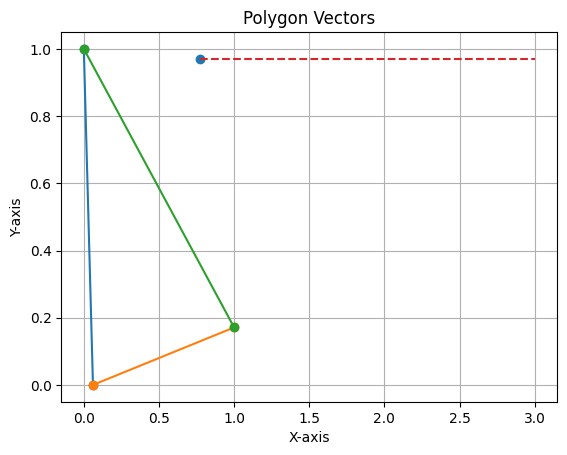

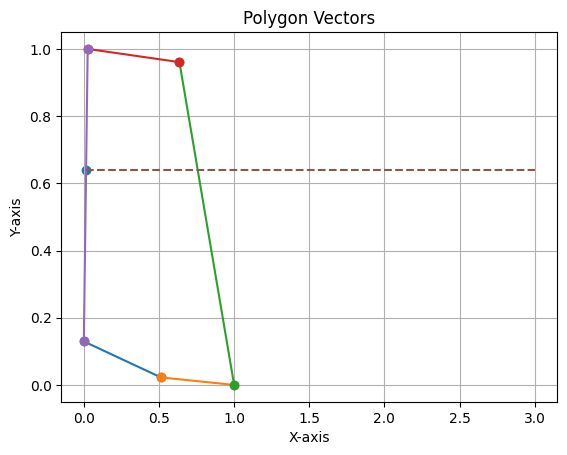

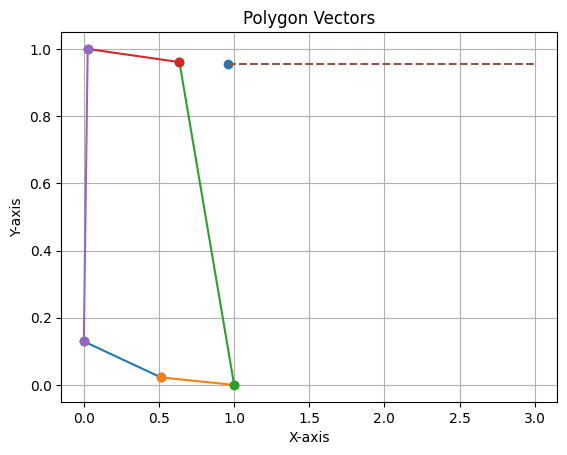

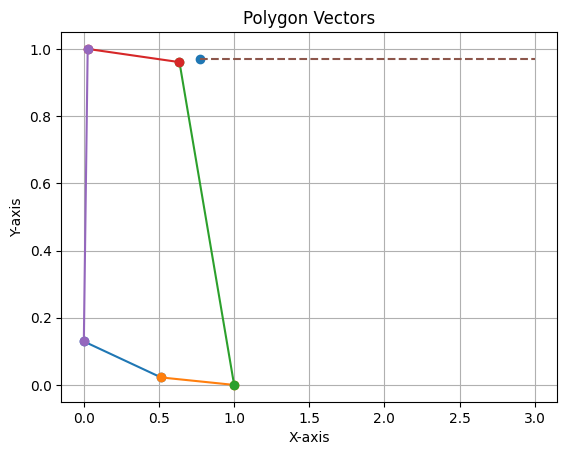

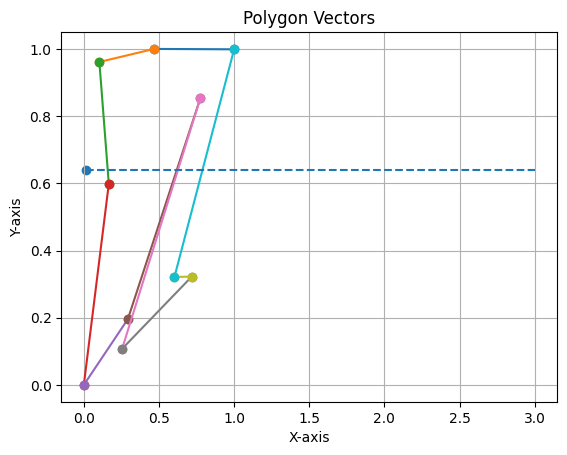

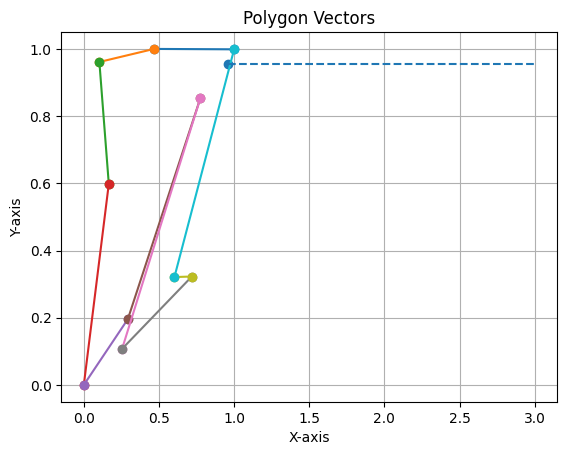

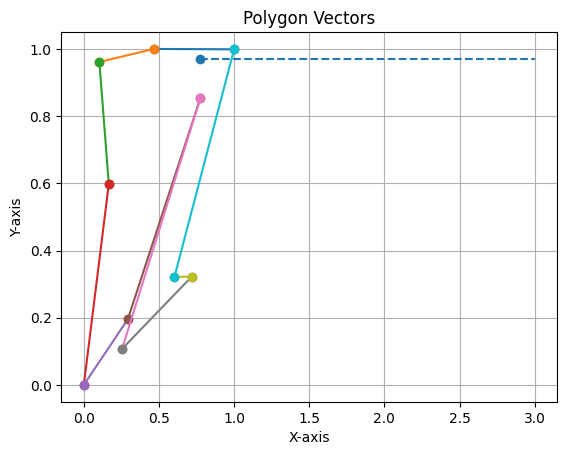

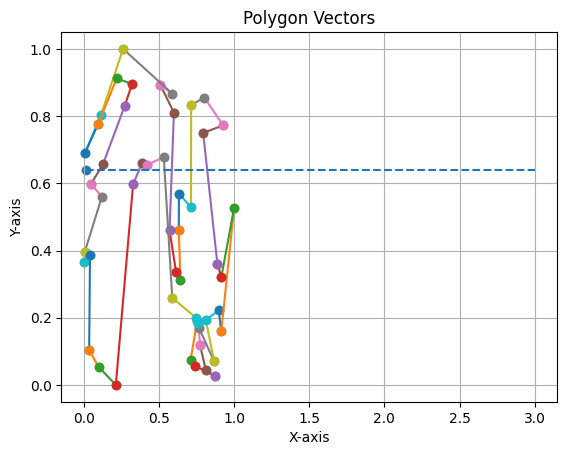

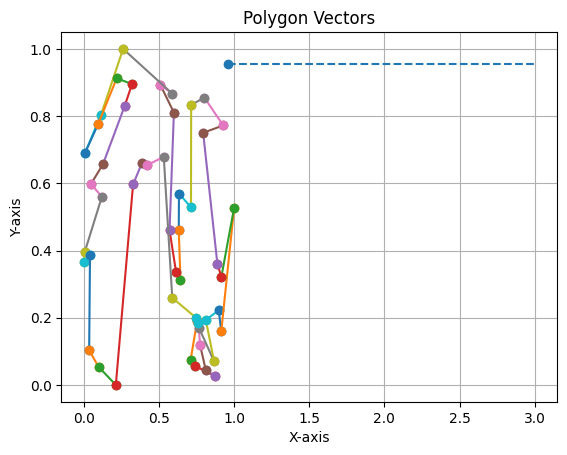

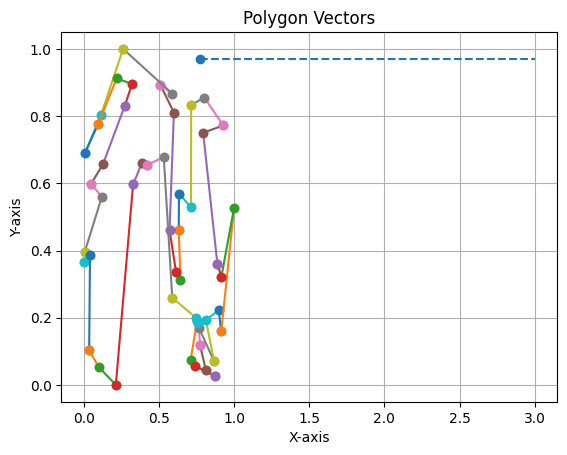

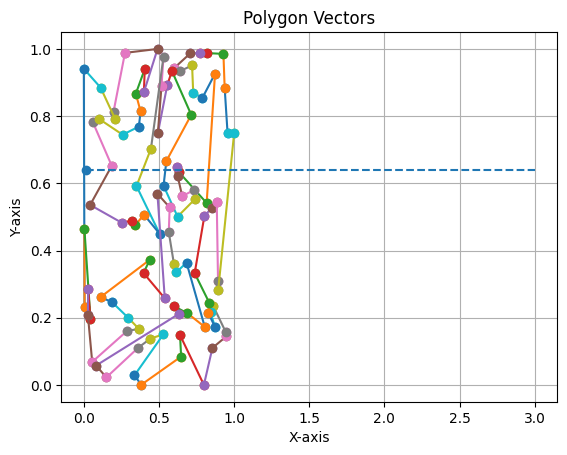

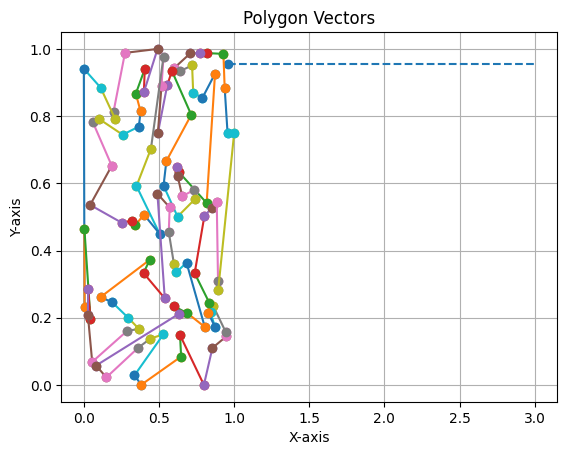

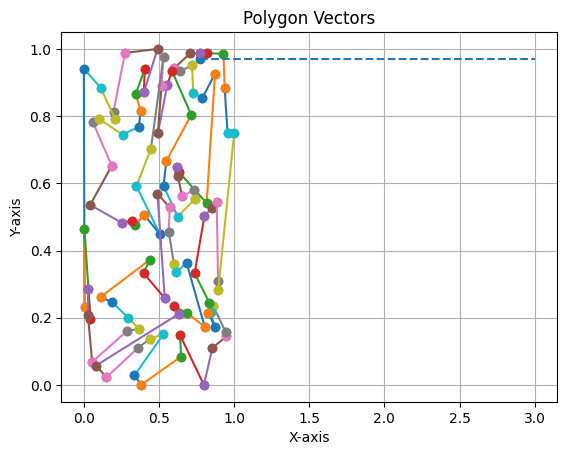

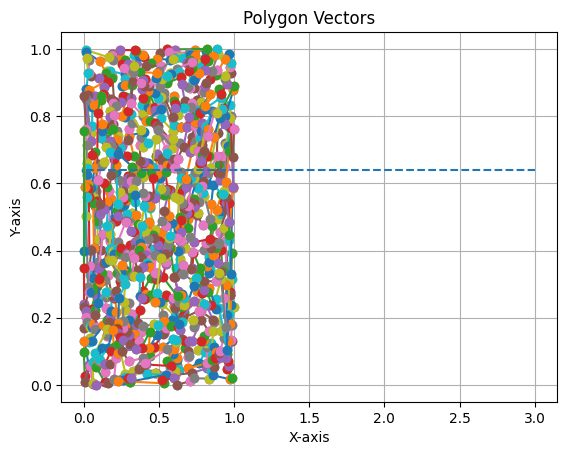

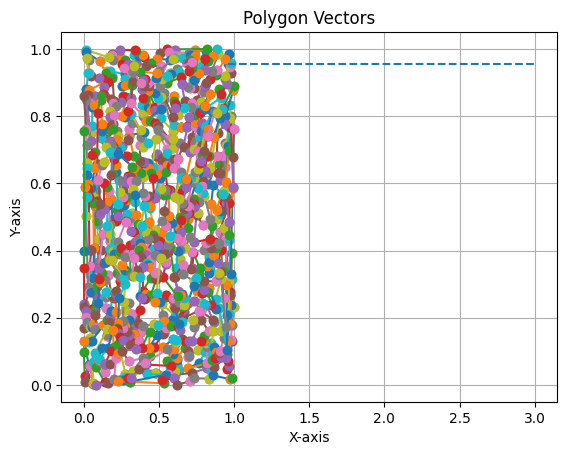

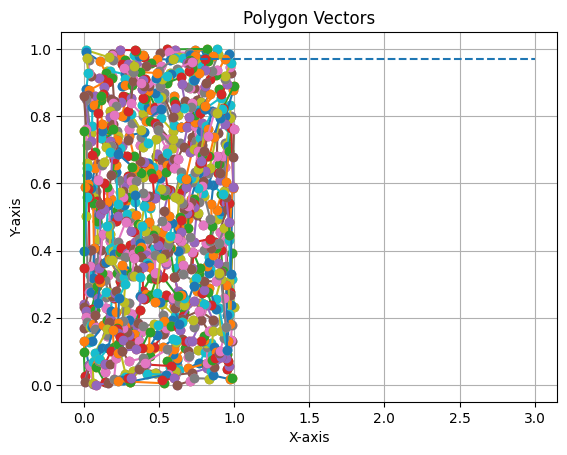

In [38]:
# Polygons
polygon_sizes = [3, 5, 10, 50, 100, 1000]
polygons = [pg.random_polygon(size) for size in polygon_sizes]

# Points
points = [(rd.uniform(0, 1), rd.uniform(0, 1)) for _ in range(3)]

def benchmark_inside_polygon(polygon, point):
    """
    Benchmark the inside_polygon function
    """
    start_time = time.perf_counter()
    polygon = draw_vectors(polygon)
    inside_polygon(polygon, point)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

results = []
# Check if points are inside polygons
for polygon in polygons:
    point_results = []
    for point in points:
        point_results.append(benchmark_inside_polygon(polygon, point))
        # plot_polygon(draw_vectors(polygon), get_right_line(point))
    results.append(st.mean(point_results))


In [34]:
import numpy as np
from scipy.stats import linregress

# fit a linear regression model to the log of the list
# sizes (s) and run times (r) to estimate the slope (m)
# log r = m log s + b


def estimate_slope(list_sizes, run_times):
    '''
    Function takes a list of list sizes and a list of run times
    and returns the slope of the linear regression model.
    '''
    m, b, _, _, _ = linregress(np.log(list_sizes), np.log(run_times))
    return m


def get_complexity(m):
    '''
    Function takes the slope of the linear regression model
    and returns the complexity of the algorithm.
    '''
    if m == 0:
        return "Constant"
    elif m < 1:
        return "Sub-linear (e.g., log n)"
    elif m == 1:
        return "Linear"
    elif m > 1 and m < 2:
        return "Between linear and quadratic (e.g., n log n)"
    elif m == 2:
        return "Quadratic (e.g., n^2)"
    elif m > 2 and m < 3:
        return "Between quadratic and cubic (e.g., n^2 log n)"
    elif m == 3:
        return "Cubic (e.g., n^3)"
    else:
        return "Out of Scope"


# Validate the the formal run time complexity of the algorithms
m = estimate_slope(polygon_sizes, results)
complexity = get_complexity(m)
print(f"Estimated Slope: {m}")
print(f"Complexity: {complexity}")
print()

Estimated Slope: 0.8317059998757272
Complexity: Sub-linear (e.g., log n)

